In [1]:
# random forest regressor on 20m resolution images
import numpy as np
import pandas as pd
import sklearn
import math

### (1) 데이터 전처리

In [2]:
df = pd.read_csv(r"./../dataset-Icheon&CHL/str_sampling_2000_20m_final_20221108.csv", low_memory = False)

In [3]:
df = pd.read_csv(r"./2000_20m_final_20221108.csv", low_memory = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   279 non-null    int64  
 1   xcoord(long)         279 non-null    float64
 2   ycoord(lat)          279 non-null    float64
 3   sampling date        279 non-null    object 
 4   sensing date         279 non-null    object 
 5   B2                   279 non-null    int64  
 6   B3                   279 non-null    int64  
 7   B4                   279 non-null    int64  
 8   B5                   279 non-null    int64  
 9   B6                   279 non-null    int64  
 10  B7                   279 non-null    int64  
 11  B8A                  279 non-null    int64  
 12  B11                  279 non-null    int64  
 13  B12                  279 non-null    int64  
 14  NDVI                 279 non-null    float64
 15  BSI                  279 non-null    flo

In [5]:
df = pd.DataFrame(df[['id','B2','B3','B4','B5','B6','B7','B8A','B11','B12','NDVI','BSI','EVI','AVI','SAVI','NDMI','SWHC','Sand (%)','Silt (%)','Clay (%)','SOC']])

In [6]:
df.head()

,id,B2,B3,B4,B5,B6,B7,B8A,B11,B12,...,BSI,EVI,AVI,SAVI,NDMI,SWHC,Sand (%),Silt (%),Clay (%),SOC
0,1,2020,2555,3095,3264,3774,4137,4234,5107,4041,...,0.134754,0.371979,-2461.869129,0.233099,-0.093459,0.70,68.0,30.5,1.6,0.71
1,1,1640,2002,2397,2781,3036,3232,3188,3986,3095,...,0.138703,0.375166,-1821.351929,0.212425,-0.111235,0.70,68.0,30.5,1.6,0.71
2,1,1929,2325,2793,3124,3434,3429,3635,4849,3928,...,0.157353,0.355184,-2044.453828,0.196469,-0.143093,0.70,68.0,30.5,1.6,0.71
3,1,2387,2955,3646,3441,4298,4607,4869,5624,4324,...,0.121869,0.345734,-2789.467172,0.215431,-0.071953,0.70,68.0,30.5,1.6,0.71
4,2,3075,3914,4958,5340,5515,5755,5967,6441,4969,...,0.115307,0.199352,-3101.858919,0.138529,-0.038201,0.75,75.2,23.6,1.2,0.86


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# # normalize1
# # band 값만 10000으로 나누기
# df['B2'] = df['B2']/10000
# df['B3'] = df['B3']/10000
# df['B4'] = df['B4']/10000
# df['B5'] = df['B5']/10000
# df['B6'] = df['B6']/10000
# df['B7'] = df['B7']/10000
# df['B8A'] = df['B8A']/10000
# df['B11'] = df['B11']/10000
# df['B12'] = df['B12']/10000


In [9]:
# df['AVI'] = df['AVI']/10000
# print(df)

In [10]:
# df['Sand (%)'] = df['Sand (%)']/100
# df['Silt (%)'] = df['Silt (%)']/100
# df['Clay (%)'] = df['Clay (%)']/100
# df

In [11]:
x = df.iloc[:, :-1]
print(x)

     id    B2    B3    B4    B5    B6    B7   B8A   B11   B12      NDVI  \
0     1  2020  2555  3095  3264  3774  4137  4234  5107  4041  0.155410   
1     1  1640  2002  2397  2781  3036  3232  3188  3986  3095  0.141629   
2     1  1929  2325  2793  3124  3434  3429  3635  4849  3928  0.130989   
3     1  2387  2955  3646  3441  4298  4607  4869  5624  4324  0.143629   
4     2  3075  3914  4958  5340  5515  5755  5967  6441  4969  0.092357   
..   ..   ...   ...   ...   ...   ...   ...   ...   ...   ...       ...   
274  91  2027  2407  2756  3122  3377  3449  3649  4283  3924  0.139422   
275  92  1895  2369  2891  3165  3277  3394  3603  4378  3873  0.109640   
276  92  1819  2208  2595  2881  3015  3146  3342  3940  3566  0.125821   
277  92  2043  2483  2853  3178  3425  3555  3656  4255  3901  0.123368   
278  93  1891  2344  2834  3052  3162  3352  3576  3887  3244  0.115757   

          BSI       EVI          AVI      SAVI      NDMI      SWHC   Sand (%)  \
0    0.134754  0.3

In [12]:
y = df.iloc[:, -1:]

In [13]:
print(y)

      SOC
0    0.71
1    0.71
2    0.71
3    0.71
4    0.86
..    ...
274  3.22
275  3.30
276  3.30
277  3.30
278  2.51

[279 rows x 1 columns]


### (2) 데이터 샘플링

적은 양의 데이터의 경우, 샘플링 시 계층적 샘플링(Stratified sampling)을 해야 전체 데이터셋의 분포와 비슷하게 서브셋 데이터를 샘플링 할 수 있다.

In [14]:
# tf.random.set_seed(21) 
np.random.seed(21)

from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.DataFrame(x)
df['SOC']= y
df

,id,B2,B3,B4,B5,B6,B7,B8A,B11,B12,...,BSI,EVI,AVI,SAVI,NDMI,SWHC,Sand (%),Silt (%),Clay (%),SOC
0,1,2020,2555,3095,3264,3774,4137,4234,5107,4041,...,0.134754,0.371979,-2461.869129,0.233099,-0.093459,0.700000,68.000000,30.5,1.600000,0.71
1,1,1640,2002,2397,2781,3036,3232,3188,3986,3095,...,0.138703,0.375166,-1821.351929,0.212425,-0.111235,0.700000,68.000000,30.5,1.600000,0.71
2,1,1929,2325,2793,3124,3434,3429,3635,4849,3928,...,0.157353,0.355184,-2044.453828,0.196469,-0.143093,0.700000,68.000000,30.5,1.600000,0.71
3,1,2387,2955,3646,3441,4298,4607,4869,5624,4324,...,0.121869,0.345734,-2789.467172,0.215431,-0.071953,0.700000,68.000000,30.5,1.600000,0.71
4,2,3075,3914,4958,5340,5515,5755,5967,6441,4969,...,0.115307,0.199352,-3101.858919,0.138529,-0.038201,0.750000,75.200000,23.6,1.200000,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,91,2027,2407,2756,3122,3377,3449,3649,4283,3924,...,0.107196,0.447978,-2078.335433,0.209117,-0.079929,0.600000,95.358650,0.0,4.641350,3.22
275,92,1895,2369,2891,3165,3277,3394,3603,4378,3873,...,0.138717,0.264193,-1949.907604,0.164447,-0.097106,0.733333,94.552529,0.0,5.447471,3.30
276,92,1819,2208,2595,2881,3015,3146,3342,3940,3566,...,0.117476,0.354331,-1863.941765,0.188716,-0.082120,0.733333,94.552529,0.0,5.447471,3.30
277,92,2043,2483,2853,3178,3425,3555,3656,4255,3901,...,0.110018,0.368180,-2030.597051,0.185037,-0.075717,0.733333,94.552529,0.0,5.447471,3.30


#### (1) id 건드리고 계층샘플링

In [16]:
# # id 대표 하나씩만 
# index_count = x['id'].value_counts()

# king_list = [0]
# sum = 0
# for i in range(1, len(index_count)):
#     sum += index_count[i] 
#     king_list.append(sum)

# print(king_list)
# king_df = pd.DataFrame(df.iloc[king_list,:])
# king_df['idx'] = king_df.index
# king_df.reset_index(drop=True, inplace=True)
# king_df

In [17]:
# dist = [0.,
#         king_df['SOC'].quantile(q=0.2,interpolation='nearest'),
#         king_df['SOC'].quantile(q=0.4,interpolation='nearest'),
#         king_df['SOC'].quantile(q=0.6,interpolation='nearest'),
#         king_df['SOC'].quantile(q=0.8,interpolation='nearest'),
#         np.inf]


# king_df['SOC Cat'] = pd.cut(king_df['SOC'],
#                         bins=dist, 
#                         labels=[1,2,3,4,5]) # SOC 정도에 대한 카테고리 설정

# # check 
# print(king_df['SOC Cat'].value_counts())
# king_df['SOC Cat'].hist(color='#4F4F4F', grid=False, bins=5, edgecolor='black', linewidth=1.2)

In [18]:
# # Sampling based on caterogries
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=42)

# for train_idx, test_idx in split.split(king_df, king_df['SOC Cat']):
#     strat_train = king_df.loc[train_idx]
#     strat_test = king_df.loc[test_idx]

# # check
# print(strat_train.shape, strat_test.shape)

# plt.figure(figsize=(12,9))
# sns.kdeplot(strat_train['SOC'], fill=True , label="Train data", multiple='stack')
# sns.kdeplot(strat_test['SOC'], fill=True,  label="Test data", multiple='stack')

# plt.legend(fontsize=20)
# plt.xlabel('SOC', fontsize=20, labelpad=20)
# plt.ylabel('Frequency', fontsize=20, labelpad=30)
# plt.show()


증가시킨 데이터셋에서의 학습, 테스트 데이터셋 인덱스 재설정

In [19]:
# str_train_idx, str_test_idx = [], []
# for i in train_idx:
#     indx = king_df.iloc[i,-2]
#     length = index_count[i+1]
#     for j in range(length):
#         str_train_idx.append(indx+j)

# for i in test_idx:
#     indx = king_df.iloc[i,-2]
#     length = index_count[i+1]
#     for j in range(length):
#         str_test_idx.append(indx+j)

# # print(str_train_idx, str_test_idx)

##### (2) id 건드리지 않고, 샘플링

In [20]:
# id 연속적으로 바꿔주기 (계층 샘플링 위해서)
index_count = df['id'].value_counts(ascending=True)
index_list = sorted(index_count.index)

dic = dict(index_count)
index_count = pd.DataFrame(sorted(dic.items()), columns=['id', 'count'])

emit = []
for i in range(index_list[0], index_list[-1]+1):
    if i not in index_list:
        emit.append(i)
print(emit) # 빠진 id
      
while emit: # 빠진 id 만큼 반복, 빠진 id 이후에 있는 id들은 1씩 앞으로 당기기
    item = emit.pop()
    df.loc[df['id'] > item,'id'] -= 1
    index_count.loc[index_count['id']> item,'id'] -= 1

[7, 8, 9, 16, 20, 21, 22, 23, 28, 29, 30, 31, 32, 33, 34, 56]


In [21]:
# id 대표 하나씩만
king_list = [0]
sum = 0
for i in range(1, len(index_count)):
    sum += int(index_count.loc[index_count['id']==i, 'count'])
    king_list.append(sum)

print(king_list)
king_df = pd.DataFrame(df.iloc[king_list,:])
king_df['idx'] = king_df.index
king_df.reset_index(drop=True, inplace=True)

[0, 4, 9, 14, 19, 22, 26, 29, 35, 41, 47, 52, 53, 58, 64, 70, 74, 78, 82, 87, 91, 95, 98, 101, 104, 107, 110, 113, 116, 119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 148, 151, 152, 153, 154, 158, 162, 166, 170, 174, 180, 185, 191, 195, 199, 203, 207, 211, 214, 218, 222, 225, 228, 231, 234, 237, 240, 244, 248, 252, 256, 260, 263, 266, 269, 272, 275, 278]


1    16
3    16
4    16
2    15
5    14
Name: SOC Cat, dtype: int64


<AxesSubplot:>

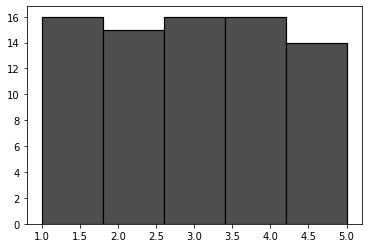

In [22]:
dist = [0.,
        king_df['SOC'].quantile(q=0.2,interpolation='nearest'),
        king_df['SOC'].quantile(q=0.4,interpolation='nearest'),
        king_df['SOC'].quantile(q=0.6,interpolation='nearest'),
        king_df['SOC'].quantile(q=0.8,interpolation='nearest'),
        np.inf]


king_df['SOC Cat'] = pd.cut(king_df['SOC'],
                        bins=dist, 
                        labels=[1,2,3,4,5]) # SOC 정도에 대한 카테고리 설정

# check 
print(king_df['SOC Cat'].value_counts())
king_df['SOC Cat'].hist(color='#4F4F4F', grid=False, bins=5, edgecolor='black', linewidth=1.2)

(53, 23) (24, 23)


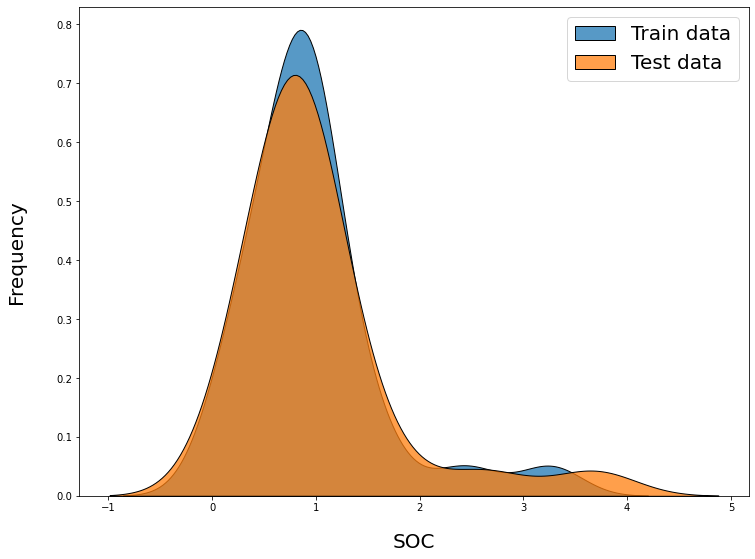

In [23]:
# Sampling based on caterogries
split = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=100)

for train_idx, test_idx in split.split(king_df, king_df['SOC Cat']):
    strat_train = king_df.loc[train_idx]
    strat_test = king_df.loc[test_idx]

# check
print(strat_train.shape, strat_test.shape)

plt.figure(figsize=(12,9))
sns.kdeplot(strat_train['SOC'], fill=True , label="Train data", multiple='stack')
sns.kdeplot(strat_test['SOC'], fill=True,  label="Test data", multiple='stack')

plt.legend(fontsize=20)
plt.xlabel('SOC', fontsize=20, labelpad=20)
plt.ylabel('Frequency', fontsize=20, labelpad=30)
plt.show()


In [24]:
str_train_idx, str_test_idx = [], []
for i in train_idx:
    indx = king_df.iloc[i,-2]
    length = int(index_count.loc[index_count['id']==i+1, 'count'])
    
    for j in range(length):
        str_train_idx.append(indx+j)

for i in test_idx:
    indx = king_df.iloc[i,-2]
    length = int(index_count.loc[index_count['id']==i+1, 'count'])
    for j in range(length):
        str_test_idx.append(indx+j)
        
train = df.loc[str_train_idx]
test = df.loc[str_test_idx]

In [25]:
train = df.loc[str_train_idx]
test = df.loc[str_test_idx]

In [26]:
pd.options.display.max_rows = 70

test

,id,B2,B3,B4,B5,B6,B7,B8A,B11,B12,...,BSI,EVI,AVI,SAVI,NDMI,SWHC,Sand (%),Silt (%),Clay (%),SOC
91,21,2198,2880,3686,4071,4291,4384,4502,5477,4072,...,0.155267,0.201303,-2383.294517,0.149478,-0.097705,0.500000,63.679245,32.547170,3.773585,0.86
92,21,2172,2819,3560,4041,4240,4389,4417,5187,4032,...,0.140715,0.225812,-2379.461797,0.161141,-0.080175,0.500000,63.679245,32.547170,3.773585,0.86
93,21,2951,3809,4616,5203,5592,5746,5862,6636,4888,...,0.121555,0.272612,-3230.317330,0.178365,-0.061930,0.500000,63.679245,32.547170,3.773585,0.86
94,21,2416,3162,3973,4553,4699,4791,4882,5886,4718,...,0.149269,0.214367,-2602.497370,0.153972,-0.093239,0.500000,63.679245,32.547170,3.773585,0.86
234,64,2495,3144,3907,4280,4564,4780,4769,5966,4596,...,0.152244,0.226854,-2522.835552,0.149023,-0.111504,0.400000,59.121622,40.878378,0.000000,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,13,4953,5427,5950,6381,6370,6356,6447,7988,7006,...,0.100166,0.248475,-2671.279570,0.060133,-0.106754,0.333333,42.553191,45.531915,11.914894,1.01
54,13,4326,4730,5144,5574,5695,5585,5628,7213,6117,...,0.107705,0.298913,-2410.674968,0.067394,-0.123433,0.333333,42.553191,45.531915,11.914894,1.01
55,13,4334,4721,5093,5348,5442,5354,5405,6886,6239,...,0.103140,0.225499,-2047.762391,0.044578,-0.120495,0.333333,42.553191,45.531915,11.914894,1.01
56,13,4078,4755,5519,6053,6064,6245,6290,8106,6340,...,0.135748,0.218537,-2991.086044,0.097930,-0.126146,0.333333,42.553191,45.531915,11.914894,1.01


x, y 나누기

In [27]:
x_train = train.loc[:,'B2':'Clay (%)']
y_train = train.loc[:,'SOC']

x_test = test.loc[:,'B2':'Clay (%)']
y_test = test.loc[:,'SOC']


### scale

In [28]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(x_train)  
# scalery = StandardScaler().fit(y_train.values.reshape(-1,1))


x_train = scalerX.transform(x_train)
# y_train = scalery.transform(y_train.values.reshape(-1,1))

x_test = scalerX.transform(x_test)
# y_test = scalery.transform(y_test.values.reshape(-1,1))

### (3) 모델링

In [29]:
##########모델 생성
model = RandomForestRegressor(max_depth=11,n_estimators=155, min_samples_split=10, bootstrap=True)


model.fit(x_train, y_train.ravel())

##########모델 검증
# R-squared
train_result = model.score(x_train, y_train)
print(train_result) #

test_result = model.score(x_test, y_test)
print(test_result)


0.9489096141028034
0.8300280565594268


### (4) 모델 결과

In [31]:
column =['B2','B3','B4','B5','B6','B7','B8A','B11','B12','NDVI','BSI','EVI','AVI','SAVI','NDMI','SWHC','Sand (%)','Silt (%)','Clay (%)']

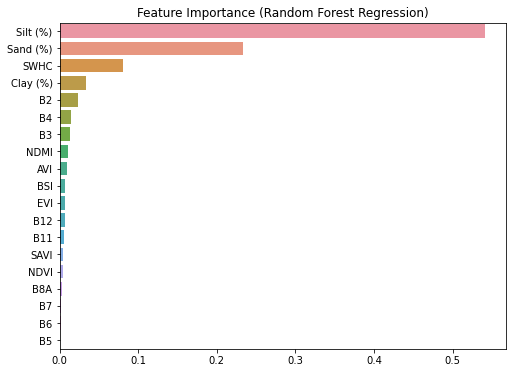

In [32]:
# feature importance

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=column)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.title('Feature Importance (Random Forest Regression)')
plt.show()

In [33]:
pd.DataFrame(ftr_importances_values).to_csv('feature_importance.csv')

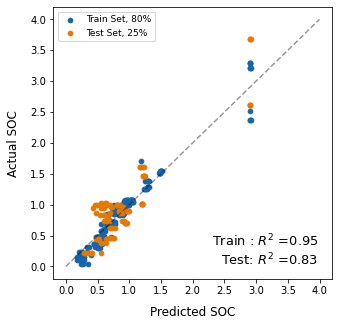

In [34]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(model.predict(x_train), y_train, color='#1864AB', label='Train Set, 80%', s=22)
ax.scatter(model.predict(x_test), y_test, color='#E67700', label='Test Set, 25%', s=22)

font = {'size':12}
font2 = {'size':14}
ax.set_xlabel("Predicted SOC", labelpad=10, fontdict=font)
ax.set_ylabel("Actual SOC", labelpad=10, fontdict=font)
ax.tick_params(axis='both', which='major', labelsize=10)
# ax.set_title('Boosting Ensemble', fontdict=font2)
ax.legend(fontsize=9, loc="upper left")

# y=x dashed line
ax.plot([0,4.0], [0,4.0], c="k", linestyle='--',alpha=0.4)

ax.text(0.95, 0.05, f"Train : $R^2$ ={train_result:0.2f}\nTest: $R^2$ ={test_result:0.2f}",
        transform=ax.transAxes, fontsize=13, ha="right")

plt.savefig(f"./str_sampling_GradientBoostingRegressor_performance.png")

In [36]:
d_train = {'train_actual': np.array(y_train).ravel(), 'train_predict': model.predict(x_train)}
d_test =  {'test_actual': np.array(y_test).ravel(), 'test_predict': model.predict(x_test)}
d_train = pd.DataFrame(d_train)
d_test = pd.DataFrame(d_test)
d_train.to_csv(path_or_buf='./stratified_train.csv', header=False, index=False)
d_test.to_csv(path_or_buf='./stratified_test.csv', header=False, index=False)